# Project: Communicate Data Findings (Dataset: Loan Data from prosper)¶
by chikita Bajaj

Preliminary Wrangling
The Dataset contains 113,917 loans, each row include infomation on the borrow's APR, status, borrowed amount, debt, etc. This investigation will be analyzing factors that influence borrow's APR and how each loan were taken by what type of borrowers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# expand maximun number of columns and row displayed

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [4]:
# load the raw dataset
df_loan = pd.read_csv('prosperLoanData.csv')
df_loan.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
10962,9DEE3402748581514127C8C,214727,2007-10-11 19:59:33.273000000,A,36,Completed,2008-12-19 00:00:00,0.14558,0.1385,0.1335,NaN,NaN,NaN,NaN,NaN,NaN,0,CA,Clerical,Full-time,69.0,True,False,NaN,2007-10-11 19:39:43.387000000,740.0,759.0,1990-03-01 00:00:00,5.0,4.0,26.0,3,450.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,15427.0,0.73,5606.0,24.0,0.95,0.0,0.29,"$50,000-74,999",True,5200.000000,AC4D340266860308675BD27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,77,21052,15000,2007-10-23 00:00:00,Q4 2007,F54B3390914125036141E57,511.57,17026.8600,15000.00,2026.8600,-73.17,0.0,0.00,0.00,0.0,1.0,0,0,0.0,238
95650,F84C3593202270999E5738C,992147,2013-11-03 11:53:09.833000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,6.0,1,CT,Administrative Assistant,Employed,154.0,False,False,NaN,2013-11-03 11:53:12,660.0,679.0,1993-11-18 00:00:00,20.0,20.0,33.0,21,1330.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,46725.0,0.70,18487.0,32.0,1.00,1.0,0.40,"$25,000-49,999",True,3750.000000,92A93697216098415A09E8E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,110555,4500,2013-11-14 00:00:00,Q4 2013,3F3D3697722314151666FF4,166.78,497.8989,280.47,217.4289,-11.10,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
96621,A30635404115836277E9510,562586,2012-02-25 13:56:16.757000000,NaN,60,Completed,2013-10-11 00:00:00,0.20358,0.1845,0.1745,0.17150,0.0420,0.12950,5.0,B,6.0,2,GA,Engineer - Mechanical,Full-time,162.0,True,False,NaN,2012-02-25 13:56:14,720.0,739.0,1998-07-24 00:00:00,12.0,9.0,42.0,9,545.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,20106.0,0.85,2944.0,33.0,1.00,0.0,0.33,"$50,000-74,999",True,4166.666667,89C0364434221116847A3D7,1.0,31.0,31.0,0.0,0.0,12500.0,0.00,-2.0,0,NaN,25,61171,15000,2012-02-28 00:00:00,Q1 2012,F049342343318418394149A,384.58,18897.9800,15000.00,3897.9800,-149.35,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
7100,54113413441249105237367,285070,2008-02-27 10:02:50.953000000,D,36,Completed,2011-03-07 00:00:00,0.17677,0.1550,0.1450,NaN,NaN,NaN,NaN,NaN,NaN,4,GA,Other,Full-time,2.0,False,False,NaN,2008-02-27 09:52:29.270000000,600.0,619.0,2001-09-18 00:00:00,3.0,3.0,7.0,3,37.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,4.0,0.50,0.0,0.48,"$1-24,999",True,400.000000,3BF8341538307960874D191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,72,28209,3050,2008-03-07 00:00:00,Q1 2008,9ED3341436792511446D0DB,104.46,3835.3000,3050.04,785.2600,-50.65,0.0,0.00,0.00,0.0,1.0,0,0,0.0,53
66498,EA603553844133114C43F1F,622107,2012-08-09 07:50:38.353000000,Na

In [5]:
# preview the dataset
print(df_loan.shape)
print(df_loan.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [6]:
# view the statistics
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
# see number of duplicated data entries
sum(df_loan.duplicated())

0

In [ ]:
df.duplicated().sum()

In [ ]:
# remove the null values
df_clean = df.dropna()

# change the type of 'member_birth_year'
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

# remove the columns that are unrelated to the research question
df_clean.drop(columns=['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_id'], inplace=True)

In [8]:
# see number of null values on each columns
df_loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [9]:
# filter out loans without ProsperScores
df_loan_2 = df_loan[df_loan['ProsperScore'].isnull()==False]

In [10]:
# remove columns and columns with empty values that are not useful in the Dateset
df_loan_2.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Univariate Exploration

In [11]:
# checking where APR has the most counts
df_loan_2.BorrowerAPR.value_counts().head()

0.35797    3672
0.35643    1644
0.30532     902
0.29510     747
0.35356     721
Name: BorrowerAPR, dtype: int64

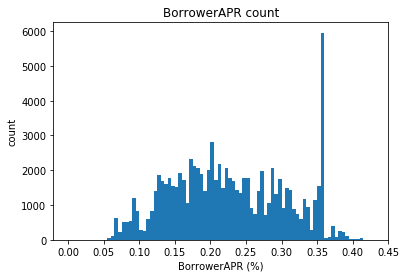

In [12]:
# see the counts for all BorrowerAPR values
bins = np.arange(0, df_loan_2['BorrowerAPR'].max(), 0.005)
plt.hist(data = df_loan_2, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df_loan_2['BorrowerAPR'].max()+0.05, 0.05));

In [13]:
df_loan_2['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

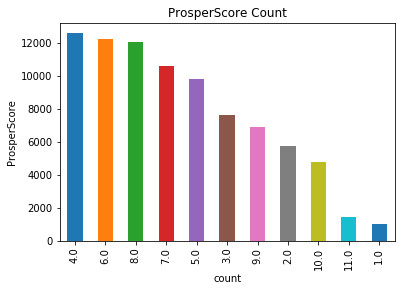

In [14]:
# see which ProsperScore borrowers received the most

df_loan_2['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Count')
plt.xlabel('count')
plt.ylabel('ProsperScore')
plt.fontsize = 12
plt.figsize=(12,12)

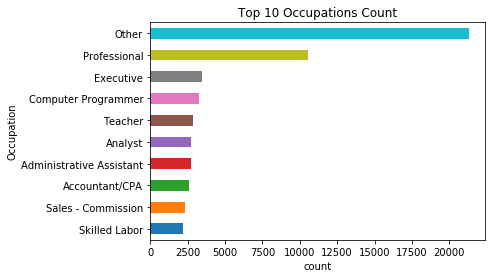

In [15]:
# see the top 10 occupations of borrowers

df_loan_2['Occupation'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 12
plt.figsize=(12,12)

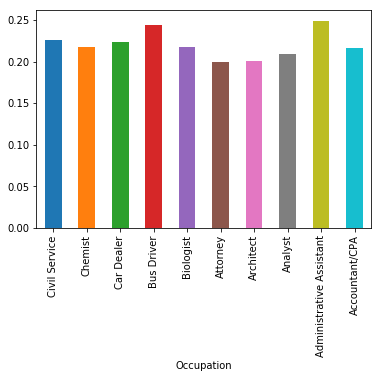

In [16]:
# bar plot for APR means for each top 10 occupations.

Top_Occupation = df_loan_2.groupby('Occupation').BorrowerAPR.mean()[9::-1]
Top_Occupation.plot(kind = 'bar')

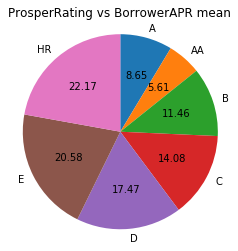

In [20]:
# plot bar chart for ProsperRating vs BorrowerAPR mean

ProsperRating_mean = df_loan_2.groupby('ProsperRating (Alpha)').BorrowerAPR.mean()
ProsperRating_mean

plt.pie(ProsperRating_mean, labels = ProsperRating_mean.index, startangle = 90,
    counterclock = False, autopct='%1.2f')
plt.axis('square') 
plt.title('ProsperRating vs BorrowerAPR mean');

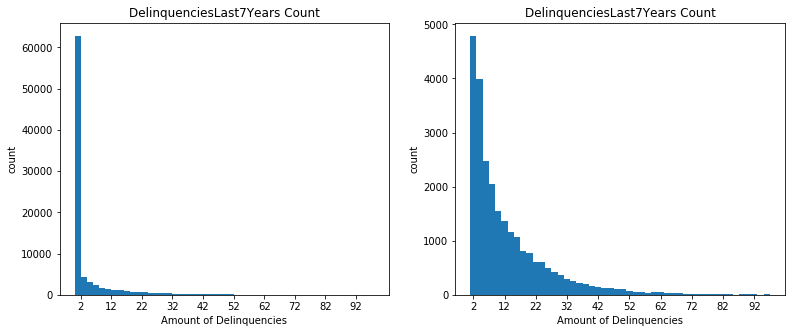

In [21]:
# Histogram for Delinquencies records count from the Last 7Years. 

plt.figure(figsize = [13, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(0, df_loan_2['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df_loan_2, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(1, df_loan_2['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df_loan_2, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

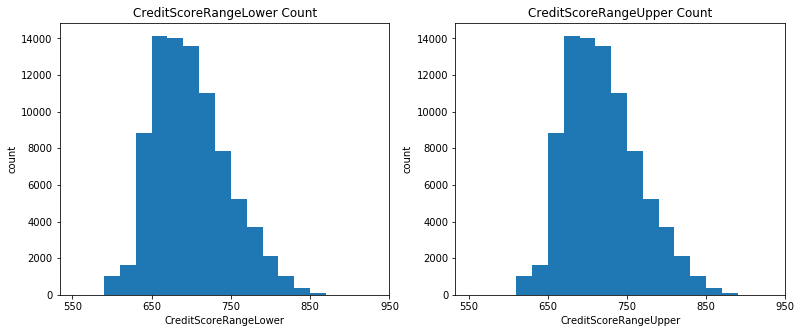

In [22]:
# Histogram for Delinquencies records count from the Last 7Years. 

plt.figure(figsize = [13, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(550, df_loan_2['CreditScoreRangeLower'].max(), 20)
plt.hist(data = df_loan_2, x = 'CreditScoreRangeLower', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeLower Count')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(550, df_loan_2['CreditScoreRangeUpper'].max(), 20)
plt.hist(data = df_loan_2, x = 'CreditScoreRangeUpper', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeUpper Count')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('count');

In [23]:
# check for outliers for credit score
print (df_loan.CreditScoreRangeUpper.describe())
print (df_loan.CreditScoreRangeLower.describe())

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64
count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64


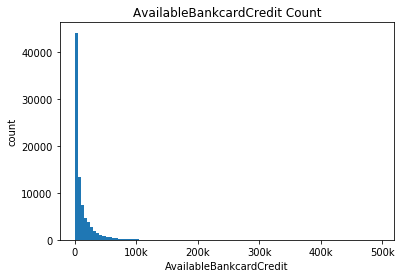

In [24]:
#counts for AvailableBankcardCredit

bins = np.arange(0, df_loan_2['AvailableBankcardCredit'].max(), 5000)
plt.hist(data = df_loan_2, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, '100k', '200k', '300k', '400k', '500k'])
plt.title('AvailableBankcardCredit Count')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('count');

In [25]:
#To See who's Creditavailible is more than 200k
High_Creditavailible = df_loan_2[df_loan_2['AvailableBankcardCredit'] > 150000]
High_Creditavailible.AvailableBankcardCredit.sort_values(ascending = False)

80178     498374.0
92406     432613.0
98518     413367.0
99673     412785.0
64246     406125.0
41112     403880.0
86383     403534.0
45212     395500.0
58930     373348.0
38163     364284.0
56942     360000.0
39963     360000.0
43607     360000.0
61020     360000.0
76296     360000.0
1801      360000.0
32553     350777.0
99273     305996.0
43998     302928.0
8352      285475.0
69640     273978.0
84947     267126.0
49365     265757.0
68191     264939.0
80379     256031.0
24958     246231.0
27990     241928.0
41929     238114.0
44416     237704.0
64323     228829.0
31141     227347.0
85922     225413.0
54325     223896.0
73613     217557.0
54038     217349.0
18457     217218.0
111386    215434.0
23693     213800.0
106726    212800.0
49261     212613.0
7337      210764.0
94729     206964.0
63908     206000.0
74369     204322.0
40041     203472.0
7448      202528.0
65874     202397.0
17455     201674.0
24493     200395.0
62779     195685.0
110598    194405.0
87618     190480.0
73521     18

In [26]:
len(High_Creditavailible['AvailableBankcardCredit'])

113

In [27]:
# removing fewer people who has high Creditavailible
df_loan_3 = df_loan_2.drop(High_Creditavailible.index)

# check
len(df_loan_3[df_loan_3['AvailableBankcardCredit'] > 150000])

0

Text(0,0.5,'count')

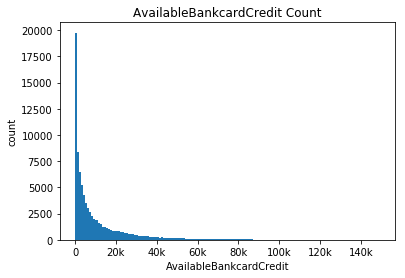

In [28]:
# plotting again for AvailableBankcardCredit count with new filter data

bins = np.arange(0, df_loan_3['AvailableBankcardCredit'].max(), 1000)
plt.hist(data = df_loan_3, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 2e4, 4e4, 6e4, 8e4, 1e5, 1.2e5, 1.4e5],
           [0, '20k', '40k', '60k', '80k', '100k', '120k', '140k'])
plt.title('AvailableBankcardCredit Count')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('count')

# Conclusion
The variables are explored for more understanding of Borrower's APR. From AvailableBankcardCredit count plot shown above, most borrowers has AvailableBankcardCreditare within 1000k. There are 113 borrowers with AvailableBankcardCreditare higher than 150k were removed from the data because they are away from most of the data point shown in the plot. Also, looking at BorrowerAPR count, there are two BorrowerAPR counts that were higher than rest of the values. Due to high number counts falling into those two values, there might be resonable reasons these two values are used. Therefore, the two BorrowerAPR values are kept untouched.

# Bivariate Exploration

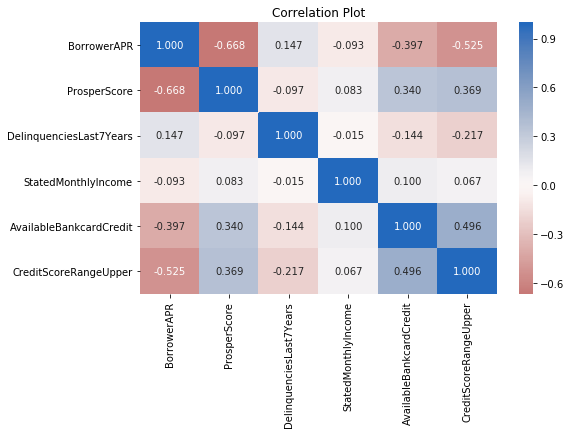

In [29]:
# correlation plot 

num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sb.heatmap(df_loan_3[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


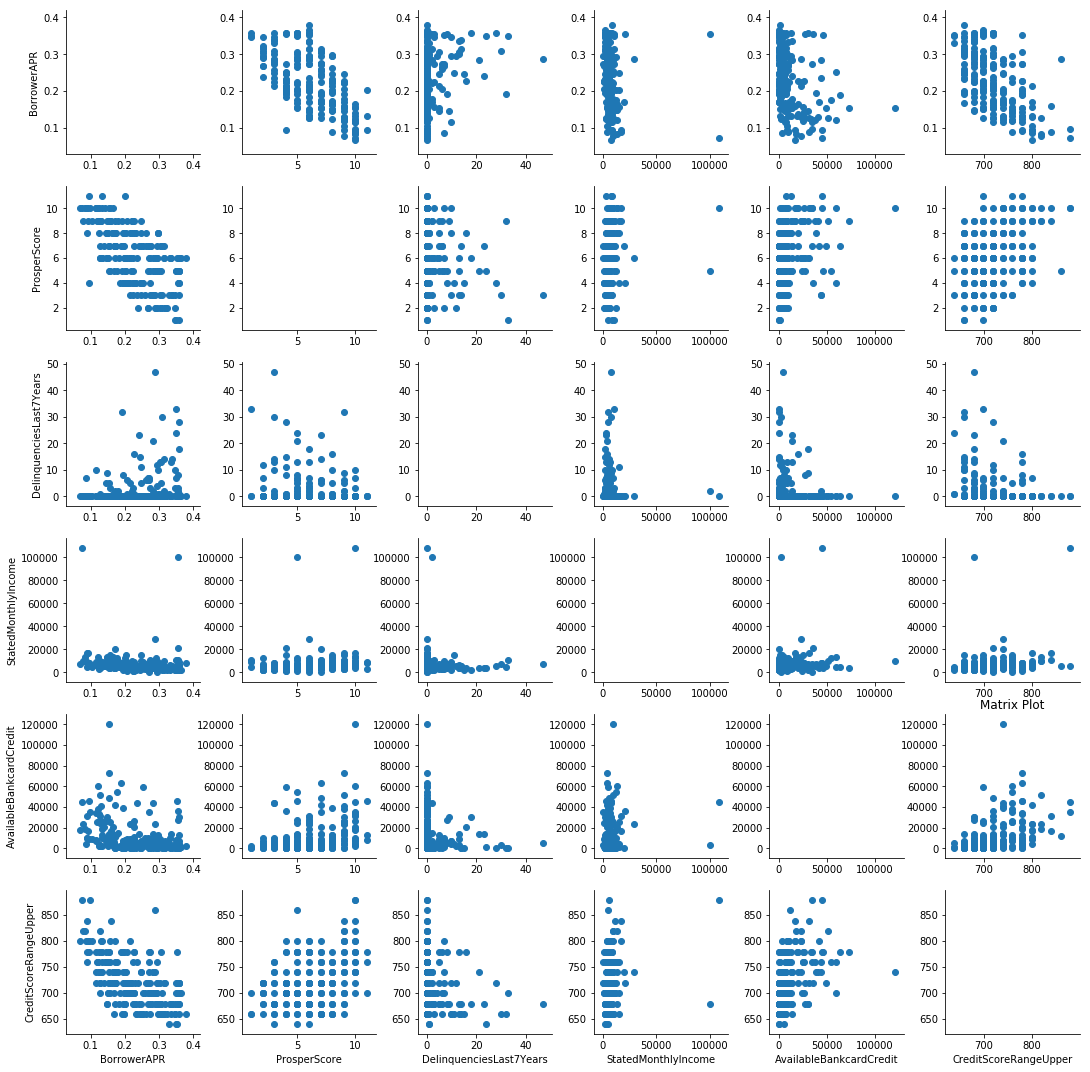

In [30]:
#Scatter plot matrix: only 300 random loans are used to see the pattern more clearer


num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

samples = np.random.choice(df_loan_3.shape[0], 300, replace = False)
loan_samp = df_loan_3.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = num_vars)
g.map_offdiag(plt.scatter)
plt.title('Matrix Plot');


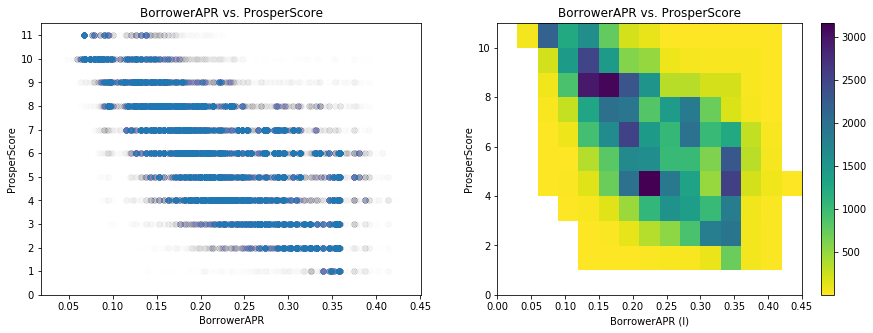

In [31]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_3, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan_3['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_loan_3['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_loan_3, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

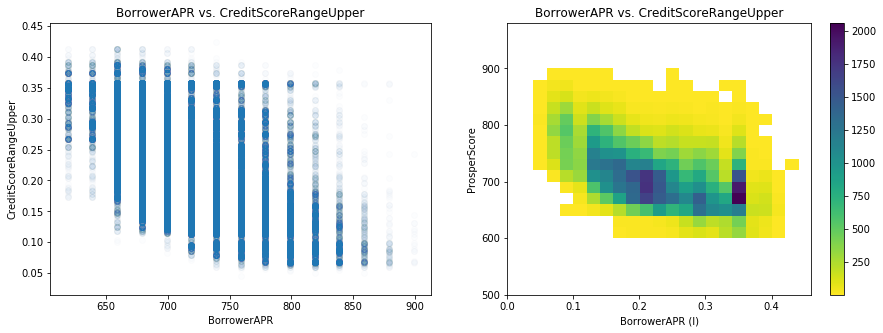

In [32]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_3, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.01)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan_2['BorrowerAPR'].max()+0.05, 0.02)
bins_y = np.arange(500, df_loan_2['CreditScoreRangeUpper'].max()+100, 20)
plt.hist2d(data = df_loan_3, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

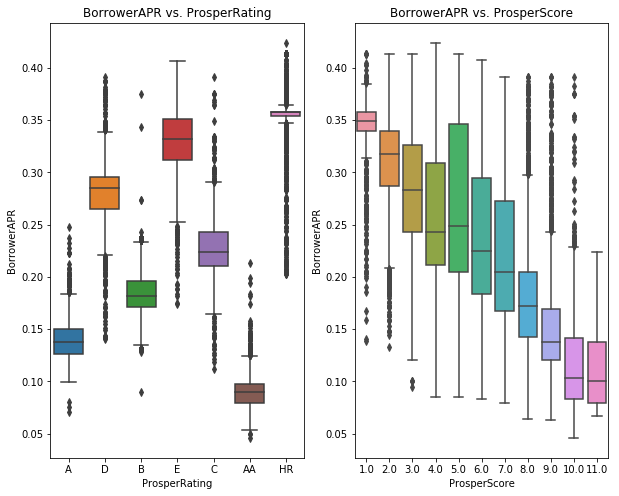

In [33]:
# Violin plot for BorrowerAPR vs. ProsperRating & ProsperScore. Shows higher rating has lower BorrowerAPR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
sb.boxplot(data = df_loan_2, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR')
plt.gcf().set_size_inches(10, 8)
plt.title('BorrowerAPR vs. ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR')

plt.subplot(1, 2, 2)
sb.boxplot(data = df_loan_2, x = 'ProsperScore', y = 'BorrowerAPR')
plt.gcf().set_size_inches(10, 8)
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

# Conclusion
The correlation and matrix plots are really helpful to preview all possibles variables related on BorrowerAPR we can trying to analyize. Out of all variables, ProsperScore has stronger relationship with BorrowerAPR (negative correlated). Univariate Exploration helps to examine data points and statistics about our variables. By looking into Bivariate Exploration, it is more clearly to gain more understanding and answer questions about BorrowerAPR.

# Multivariate Exploration

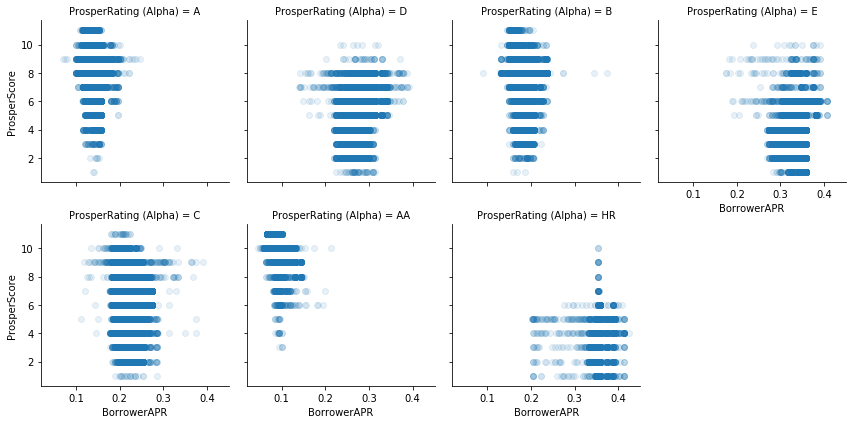

In [34]:
g = sb.FacetGrid(data = df_loan_3, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')

plt.show()

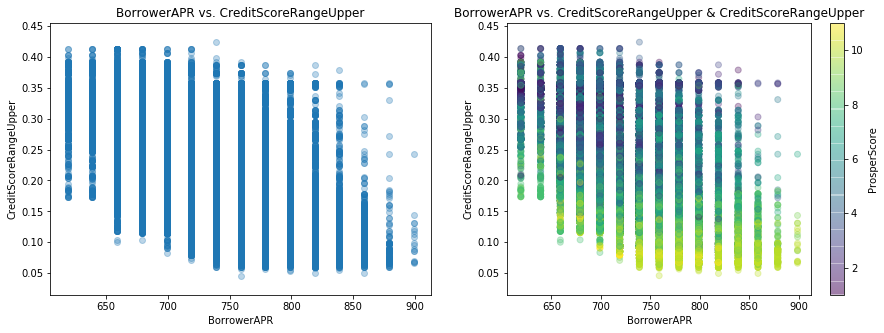

In [35]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_3, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.3)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
plt.scatter(data = df_loan_3, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

# conclusion
The correlation and matrix plots in previous plots can also be counted as part of Multivariate Exploration. To be more efficient, these two plots can be done ealier part of exploration to preview all variables and how they interact to each other. Adding to that, FacetGrid shows how each rating groups differ in terms of BorrowerAPR vs ProsperScore.

From all above visualizations created from univariate exploration to multivariate exploration, many variable are found to be negatively correlated to BorrowerAPR, whereas ProspoerScore gives the strongest negative relationship.